In [1]:
import numpy as np
import pandas as pd
import math
import srd
import sklearn.model_selection as sklm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [64]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
p_m = pd.read_csv('p_metric_29.csv',index_col=0)
n_m = pd.read_csv('n_metric_29.csv',index_col=0)

In [3]:
ref1 = 'max'
ref2 = 'min'

In [4]:
cv_iterator=sklm.KFold(n_splits=7)
srd_collector1=[]
srd_collector2=[]
for train_index,test_index in cv_iterator.split(p_m):
    srd_current1=srd.srd_core(p_m.iloc[train_index], ref1)
    srd_collector1.append(srd_current1)
        
for train_index,test_index in cv_iterator.split(n_m):    
    srd_current2=srd.srd_core(n_m.iloc[train_index], ref2)
    srd_collector2.append(srd_current2)
           
srd_collector1=pd.DataFrame(srd_collector1)
srd_collector2=pd.DataFrame(srd_collector2)

In [5]:
srd_collector1

,CSEL,Stacking_NuSCV,Stacking_Ridge,Stacking_RF,Stacking_ETs,Stacking_LR,DF,Ada,Bagging,BNB,...,LR,NuSVC,PA,Perceptron,QDA,RF,Ridge,SGD,SVC,XGB
0,9.920000,11.680000,12.000000,9.120000,10.960000,13.760000,12.640000,12.000000,13.120000,17.040000,...,10.720000,13.440000,12.320000,10.240000,28.880000,15.520000,13.760000,12.160000,14.880000,11.680000
1,9.760000,15.680000,15.680000,14.560000,16.720000,15.840000,16.160000,14.560000,15.200000,20.080000,...,14.560000,16.000000,16.640000,15.360000,36.400000,17.600000,15.840000,16.160000,17.840000,15.040000
2,7.840000,13.120000,13.120000,13.440000,15.200000,13.280000,14.240000,12.320000,12.960000,16.480000,...,12.480000,13.600000,15.520000,14.240000,34.720000,15.680000,13.600000,15.360000,15.200000,12.800000
3,3.846154,12.153846,12.000000,11.230769,13.000000,12.307692,12.615385,13.846154,13.230769,18.692308,...,12.461538,12.000000,14.461538,12.769231,36.538462,14.769231,12.153846,13.692308,15.769231,13.384615
4,8.769231,13.846154,13.846154,13.846154,14.846154,14.153846,15.384615,13.384615,13.692308,17.769231,...,12.923077,14.307692,16.000000,13.692308,29.230769,16.615385,14.307692,15.538462,16.615385,13.692308
5,9.538462,12.615385,12.461538,11.384615,13.153846,12.769231,12.769231,12.615385,12.307692,16.230769,...,12.307692,12.615385,14.153846,12.153846,31.923077,13.538462,12.769231,13.846154,15.153846,12.615385
6,8.769231,13.846154,13.846154,13.846154,14.153846,14.153846,15.538462,14.000000,14.461538,18.923077,...,13.692308,14.615385,16.615385,14.153846,32.615385,16.923077,14.461538,16.307692,17.076923,14.769231


In [6]:
srd_collector2

,CSEL,Stacking_NuSCV,Stacking_Ridge,Stacking_RF,Stacking_ETs,Stacking_LR,DF,Ada,Bagging,BNB,...,LR,NuSVC,PA,Perceptron,QDA,RF,Ridge,SGD,SVC,XGB
0,10.937500,10.937500,10.937500,9.375000,6.250000,9.375000,10.937500,10.937500,10.937500,15.625000,...,10.937500,9.375000,6.250000,6.250000,39.062500,9.375000,10.937500,6.250000,12.500000,10.937500
1,15.625000,15.625000,15.625000,14.062500,12.500000,12.500000,15.625000,12.500000,12.500000,20.312500,...,12.500000,14.062500,12.500000,10.937500,45.312500,15.625000,12.500000,12.500000,17.187500,12.500000
2,12.500000,12.500000,10.937500,10.937500,9.375000,9.375000,10.937500,10.937500,10.937500,12.500000,...,10.937500,10.937500,7.812500,9.375000,23.437500,10.937500,10.937500,7.812500,10.937500,10.937500
3,9.375000,9.375000,7.812500,9.375000,10.937500,4.687500,7.812500,6.250000,6.250000,10.937500,...,6.250000,6.250000,9.375000,9.375000,28.125000,7.812500,6.250000,9.375000,9.375000,6.250000
4,14.062500,14.062500,12.500000,12.500000,10.937500,9.375000,12.500000,10.937500,10.937500,12.500000,...,10.937500,10.937500,10.937500,9.375000,31.250000,12.500000,10.937500,10.937500,10.937500,10.937500
5,11.111111,11.111111,9.722222,9.722222,8.333333,9.722222,9.722222,9.722222,9.722222,18.055556,...,9.722222,9.722222,6.944444,6.944444,33.333333,11.111111,9.722222,6.944444,13.888889,9.722222
6,12.500000,12.500000,11.111111,11.111111,9.722222,8.333333,11.111111,9.722222,9.722222,12.500000,...,9.722222,9.722222,8.333333,8.333333,33.333333,11.111111,9.722222,8.333333,12.500000,9.722222


In [9]:
srd_collector1_melt = srd_collector1.melt()
srd_collector1_melt.columns = ['Model','SRD_Value']
srd_collector1_melt['refVector'] = 'Max'

In [10]:
srd_collector2_melt = srd_collector2.melt()
srd_collector2_melt.columns = ['Model','SRD_Value']
srd_collector2_melt['refVector'] = 'Min'

In [11]:
srd_collector_melt = pd.concat([srd_collector1_melt,srd_collector2_melt])
srd_collector_melt

,Model,SRD_Value,refVector
0,CSEL,9.920000,Max
1,CSEL,9.760000,Max
2,CSEL,7.840000,Max
3,CSEL,3.846154,Max
4,CSEL,8.769231,Max
...,...,...,...
198,XGB,10.937500,Min
199,XGB,6.250000,Min
200,XGB,10.937500,Min
201,XGB,9.722222,Min


In [26]:
model1 = ols('SRD_Value~C(Model)',data=srd_collector1_melt).fit()
anova1_table = anova_lm(model1, typ = 2)
anova1_table

,sum_sq,df,F,PR(>F)
C(Model),3618.267399,28.0,48.608089,8.253377e-68
Residual,462.576243,174.0,NaN,NaN


In [31]:
mc1 = MultiComparison(srd_collector1_melt['SRD_Value'],srd_collector1_melt['Model'])
tukey_result1 = mc1.tukeyhsd(alpha = 0.05)
print(tukey_result1)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1         group2     meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------
           Ada            BNB   4.6413 0.0001   1.3333   7.9493   True
           Ada        Bagging   0.3209    1.0  -2.9871   3.6289  False
           Ada           CSEL  -4.8976    0.0  -8.2056  -1.5896   True
           Ada             DF   0.9459    1.0  -2.3621   4.2539  False
           Ada             DT    2.218 0.7292    -1.09    5.526  False
           Ada             ET   1.1648    1.0  -2.1432   4.4728  False
           Ada            ETs  -0.3033    1.0  -3.6113   3.0047  False
           Ada            GBC   2.2699 0.6856  -1.0381   5.5779  False
           Ada            GNB    9.756    0.0   6.4481   13.064   True
           Ada             GP   3.7811 0.0075   0.4731   7.0891   True
           Ada            KNN   6.2998    0.0   2.9918   9.6078   True
      

In [32]:
tukey_result1 = pd.DataFrame(data=tukey_result1._results_table.data[1:], columns=tukey_result1._results_table.data[0])
tukey_result1.to_csv("tukey_result_max.csv")

In [33]:
model2 = ols('SRD_Value~C(Model)',data=srd_collector2_melt).fit()
anova2_table = anova_lm(model2, typ = 2)
anova2_table

,sum_sq,df,F,PR(>F)
C(Model),3820.211476,28.0,22.621601,3.238441e-44
Residual,1049.434386,174.0,NaN,NaN


In [34]:
mc2 = MultiComparison(srd_collector2_melt['SRD_Value'],srd_collector2_melt['Model'])
tukey_result2 = mc2.tukeyhsd(alpha = 0.05)
print(tukey_result2)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1         group2     meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------
           Ada            BNB   4.4891 0.1482  -0.4934   9.4716  False
           Ada        Bagging      0.0    1.0  -4.9825   4.9825  False
           Ada           CSEL   2.1577 0.9982  -2.8248   7.1403  False
           Ada             DF   1.0913    1.0  -3.8913   6.0738  False
           Ada             DT   1.9593 0.9996  -3.0232   6.9419  False
           Ada             ET   1.9593 0.9996  -3.0232   6.9419  False
           Ada            ETs   2.1577 0.9982  -2.8248   7.1403  False
           Ada            GBC   0.1736    1.0  -4.8089   5.1561  False
           Ada            GNB  -0.2232    1.0  -5.2057   4.7593  False
           Ada             GP      0.0    1.0  -4.9825   4.9825  False
           Ada            KNN  -0.0248    1.0  -5.0073   4.9577  False
      

In [35]:
tukey_result2 = pd.DataFrame(data=tukey_result2._results_table.data[1:], columns=tukey_result2._results_table.data[0])
tukey_result2.to_csv("tukey_result_min.csv")

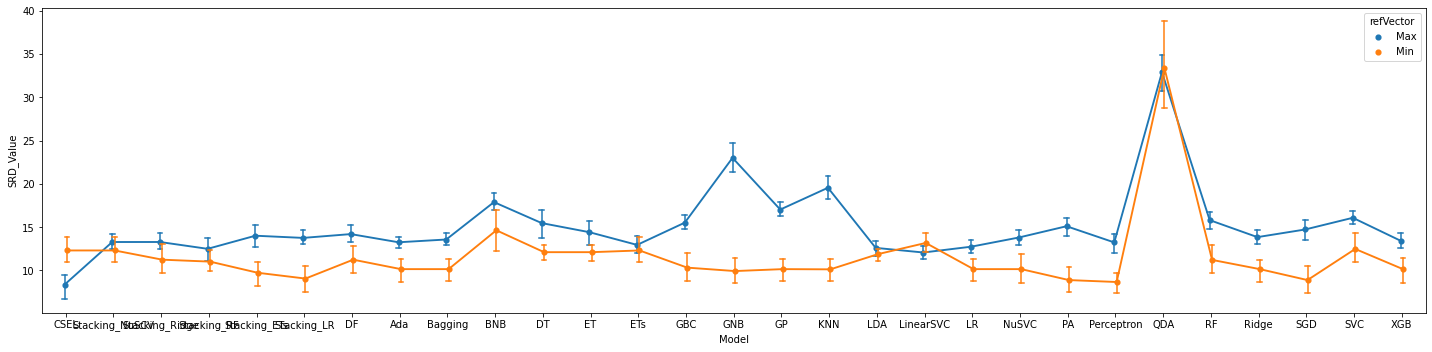

In [14]:
fig, ax = plt.subplots(figsize=(20,5))

sns.pointplot(x='Model',y='SRD_Value',data = srd_collector_melt,hue="refVector",
              scale=0.7,marker="$\circ$", errwidth=1.5,capsize=0.1,              
              ci=95,dodge=True
             )


fig.tight_layout()

plt.show()

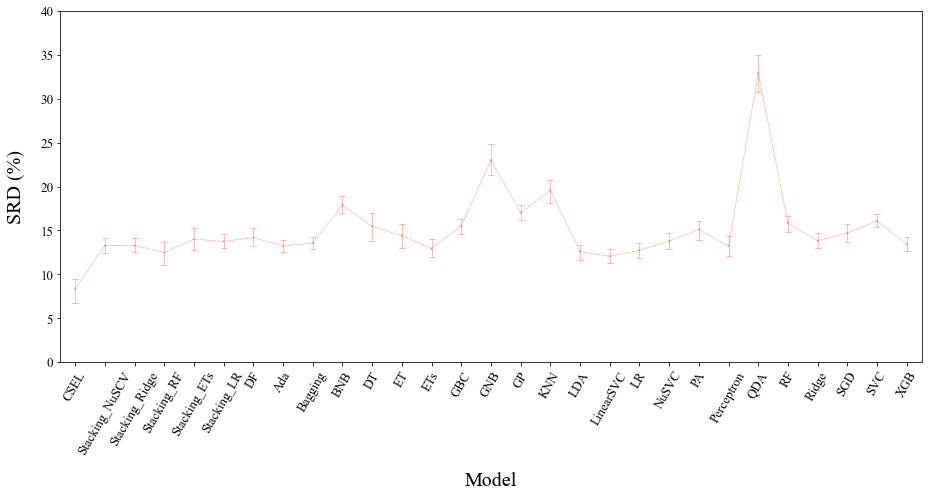

In [67]:
fig, ax = plt.subplots(figsize=(13,7))

sns.pointplot(x='Model',y='SRD_Value',data = srd_collector1_melt,
              scale=0.2,marker="$\circ$", errwidth=0.5,capsize=0.2,linestyles='--',
              color='#ff796c',              
              ci=95
             )

ax.set_ylim(bottom=0,top=40)

ax.set_xlabel('Model',size=20,labelpad=15)
ax.set_ylabel('SRD (%)',size=20,labelpad=15)

ax.tick_params(labelsize=13)

plt.xticks(rotation=60)


fig.tight_layout()
plt.savefig('Fig2-D1.pdf', bbox_inches='tight')
plt.show()

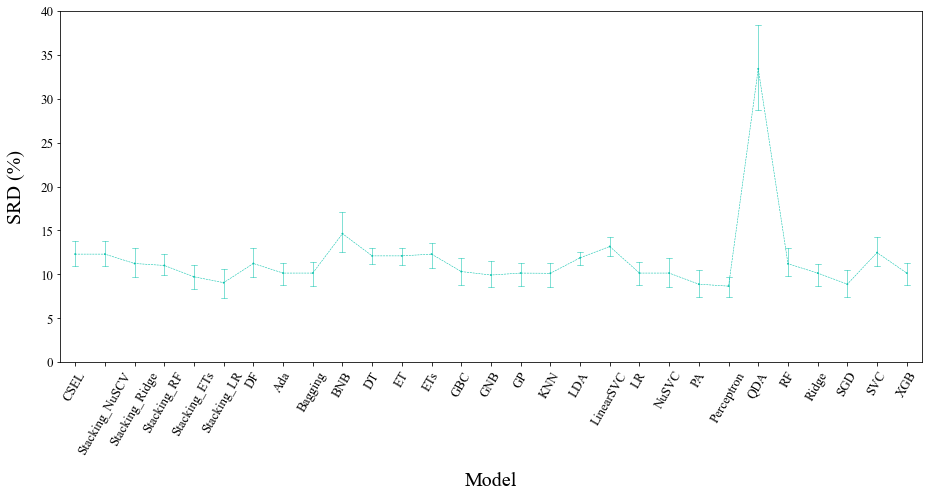

In [68]:
fig, ax = plt.subplots(figsize=(13,7))

sns.pointplot(x='Model',y='SRD_Value',data = srd_collector2_melt,
              scale=0.2,marker="$\circ$", errwidth=0.5,capsize=0.2,linestyles='--',
              color='#06c2ac',              
              ci=95
             )

ax.set_ylim(bottom=0,top=40)

ax.set_xlabel('Model',size=20,labelpad=15)
ax.set_ylabel('SRD (%)',size=20,labelpad=15)

ax.tick_params(labelsize=13)

plt.xticks(rotation=60)


fig.tight_layout()
plt.savefig('Fig2-D2.pdf', bbox_inches='tight')
plt.show()